# Gradiente descendente

## Algoritmo de Descenso de Gradiente
El descenso de gradiente (Gradient Descent) es un algoritmo de optimización usado para minimizar una función de costo o función de pérdida.
Su objetivo es encontrar los valores de los parámetros (por ejemplo, los pesos de un modelo) que minimicen el error del modelo.

$$ min_{\theta}  J(\theta)$$

## Idea General

La idea principal es **moverse en la dirección opuesta al gradiente** de la función de costo respecto a los parámetros, ya que esa es la dirección de **mayor descenso** de la función.


* Iniciamos con un punto arbitario $\theta_0$

* En cada iteración, actualizamos los parámetros usando la siguiente regla:

$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

donde:

- $ \theta $: vector de parámetros del modelo (por ejemplo, pesos $ w $ y sesgo $ b $)  
- $ \eta $: tasa de aprendizaje (*learning rate*), controla el tamaño del paso  
- $ \nabla_\theta J(\theta) $: gradiente de la función de costo respecto a los parámetros  
- $ J(\theta) $: función de costo o pérdida  

---

## Pasos del Algoritmo

1. **Inicializar** los parámetros $ \theta = (\theta_0, \theta_1)$ (por ejemplo, con valores aleatorios pequeños).
2. **Calcular la función de costo** $ J(\theta)$ para ver si el valor decreció.
3. **Calcular la derivada (Gradiente)** $ \nabla_\theta J(\theta) $ en el punto anterior $ \theta = (\theta_0, \theta_1)$.
4. **Actualizar los parámetros** según:
   
   $$\theta := \theta - \eta \cdot \nabla_\theta J(\theta)$$
5. **Repetir** los pasos 2–4 hasta que la función de costo converja (es decir, los cambios sean muy pequeños).

![](https://us.numerica.mx/wp-content/uploads/2020/10/kisspng-gradient-descent-artificial-neural-network-mathema-5be60853f41f72.8663402015418020679999.png)

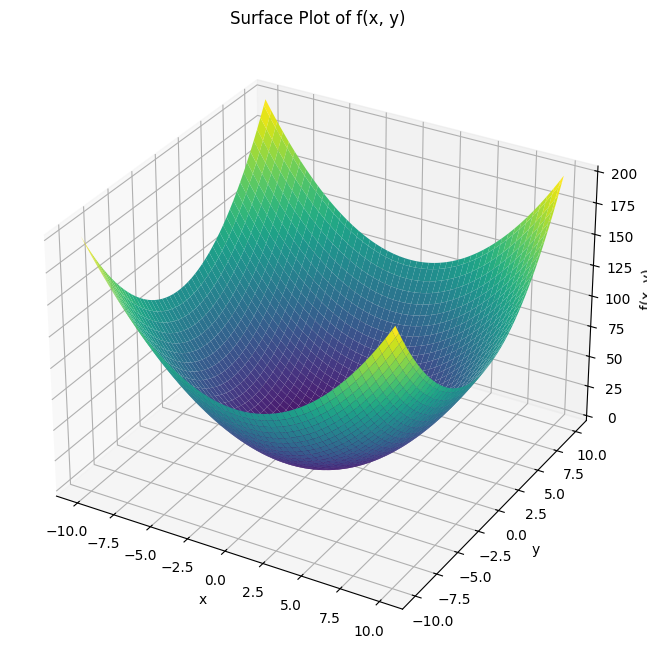

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    """The function to minimize."""
    return x**2 + y**2 

# Create a meshgrid for x and y values
x = np.linspace(-10, 10, 100)  # Range for x
y = np.linspace(-10, 10, 100)  # Range for y
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values (function output)
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of f(x, y)')

# Show the plot
plt.show()

$$f(x,y) = x^2 + y^2$$

$$\min_{x,y} f(x,y)$$

$$
\frac{\partial f}{\partial x} = 2x
$$

$$
\frac{\partial f}{\partial y} = 2y
$$

$$\nabla f(x,y) = (2x, 2y)$$

In [2]:
import numpy as np

def f(x, y):
    """The function to minimize."""
    return x**2 + y**2

def gradient_f(x, y):
    """The gradient of the function f(x, y)."""
    df_dx = 2*x
    df_dy = 2*y
    return np.array([df_dx, df_dy])

def gradient_descent_two_variables(initial_x, initial_y, learning_rate, num_iterations):
    """
    Performs gradient descent for a function with two variables.

    Args:
        initial_x (float): Initial value for the first variable.
        initial_y (float): Initial value for the second variable.
        learning_rate (float): The step size for each update.
        num_iterations (int): The number of iterations to perform.

    Returns:
        tuple: The optimized (x, y) values.
    """
    x, y = initial_x, initial_y

    for i in range(num_iterations):
        grad = gradient_f(x, y)
        x = x - learning_rate * grad[0]
        y = y - learning_rate * grad[1]

        # Print current values and function value for monitoring
        if i % 50 == 0:
            print(f"Iteration {i+1}: x={x:.4f}, y={y:.4f}, f(x,y)={f(x,y):.4f}")

    return x, y


In [3]:
# Example usage
initial_x = 10.0
initial_y = 250.0
learning_rate = 0.01
num_iterations = 1000

optimized_x, optimized_y = gradient_descent_two_variables(initial_x, initial_y, learning_rate, num_iterations)

print(f"Optimized x: {optimized_x:.4f}")
print(f"Optimized y: {optimized_y:.4f}")
print(f"Minimum value of f(x,y): {f(optimized_x, optimized_y):.4f}")

Iteration 1: x=9.8000, y=245.0000, f(x,y)=60121.0400
Iteration 51: x=3.5689, y=89.2216, f(x,y)=7973.2256
Iteration 101: x=1.2997, y=32.4918, f(x,y)=1057.4056
Iteration 151: x=0.4733, y=11.8325, f(x,y)=140.2327
Iteration 201: x=0.1724, y=4.3090, f(x,y)=18.5976
Iteration 251: x=0.0628, y=1.5692, f(x,y)=2.4664
Iteration 301: x=0.0229, y=0.5715, f(x,y)=0.3271
Iteration 351: x=0.0083, y=0.2081, f(x,y)=0.0434
Iteration 401: x=0.0030, y=0.0758, f(x,y)=0.0058
Iteration 451: x=0.0011, y=0.0276, f(x,y)=0.0008
Iteration 501: x=0.0004, y=0.0101, f(x,y)=0.0001
Iteration 551: x=0.0001, y=0.0037, f(x,y)=0.0000
Iteration 601: x=0.0001, y=0.0013, f(x,y)=0.0000
Iteration 651: x=0.0000, y=0.0005, f(x,y)=0.0000
Iteration 701: x=0.0000, y=0.0002, f(x,y)=0.0000
Iteration 751: x=0.0000, y=0.0001, f(x,y)=0.0000
Iteration 801: x=0.0000, y=0.0000, f(x,y)=0.0000
Iteration 851: x=0.0000, y=0.0000, f(x,y)=0.0000
Iteration 901: x=0.0000, y=0.0000, f(x,y)=0.0000
Iteration 951: x=0.0000, y=0.0000, f(x,y)=0.0000
Optim

## Regresión Lineal con Gradiente Descendente

$$
y = m x + b
$$

$$
J(m,b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - m x_i - b)^2
$$

$$
\frac{\partial J}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_i \, (y_i - m x_i - b)
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - m x_i - b)
$$

$$
m := m - \alpha \frac{\partial J}{\partial m}
\quad,\quad
b := b - \alpha \frac{\partial J}{\partial b}
$$


In [4]:
class GradientDescentLinearRegression:
    """
    Implementacion de Gradiente Descendiente
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        """
        Actualizacion de los pesos con gradiente descendente
        """
        b = 0
        m = 5
        n = X.shape[0]
        for i in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)

            # Print current values and function value for monitoring
            if i % 50 == 0:
                print(f"Iteration {i+1}: b={b:.4f}, m={m:.4f}")
        
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [5]:
X = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.5)
y = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.25)

Iteration 1: b=0.0161, m=4.9495
Iteration 51: b=0.5719, m=3.0329
Iteration 101: b=0.7951, m=1.9577
Iteration 151: b=0.8415, m=1.3670
Iteration 201: b=0.7992, m=1.0533
Iteration 251: b=0.7172, m=0.8961
Iteration 301: b=0.6220, m=0.8260
Iteration 351: b=0.5275, m=0.8030
Iteration 401: b=0.4401, m=0.8044
Iteration 451: b=0.3626, m=0.8175
Iteration 501: b=0.2955, m=0.8353
Iteration 551: b=0.2384, m=0.8540
Iteration 601: b=0.1902, m=0.8719
Iteration 651: b=0.1498, m=0.8880
Iteration 701: b=0.1162, m=0.9020
Iteration 751: b=0.0883, m=0.9141
Iteration 801: b=0.0652, m=0.9243
Iteration 851: b=0.0461, m=0.9329
Iteration 901: b=0.0303, m=0.9401
Iteration 951: b=0.0173, m=0.9460


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

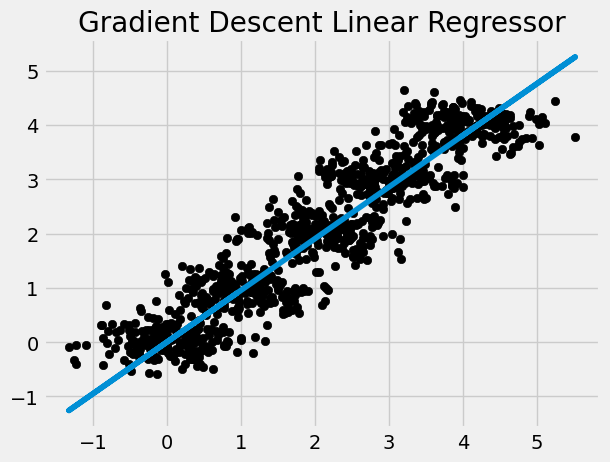

In [8]:
model = GradientDescentLinearRegression(learning_rate=0.001, iterations=1000)
model.fit(X, y)

plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")